In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF , PCA
from sklearn.preprocessing import StandardScaler

digits = np.loadtxt("mnist_test.csv",delimiter=",") 
mnist_data = digits[:,1:]
mnist_labels = digits[:,0]


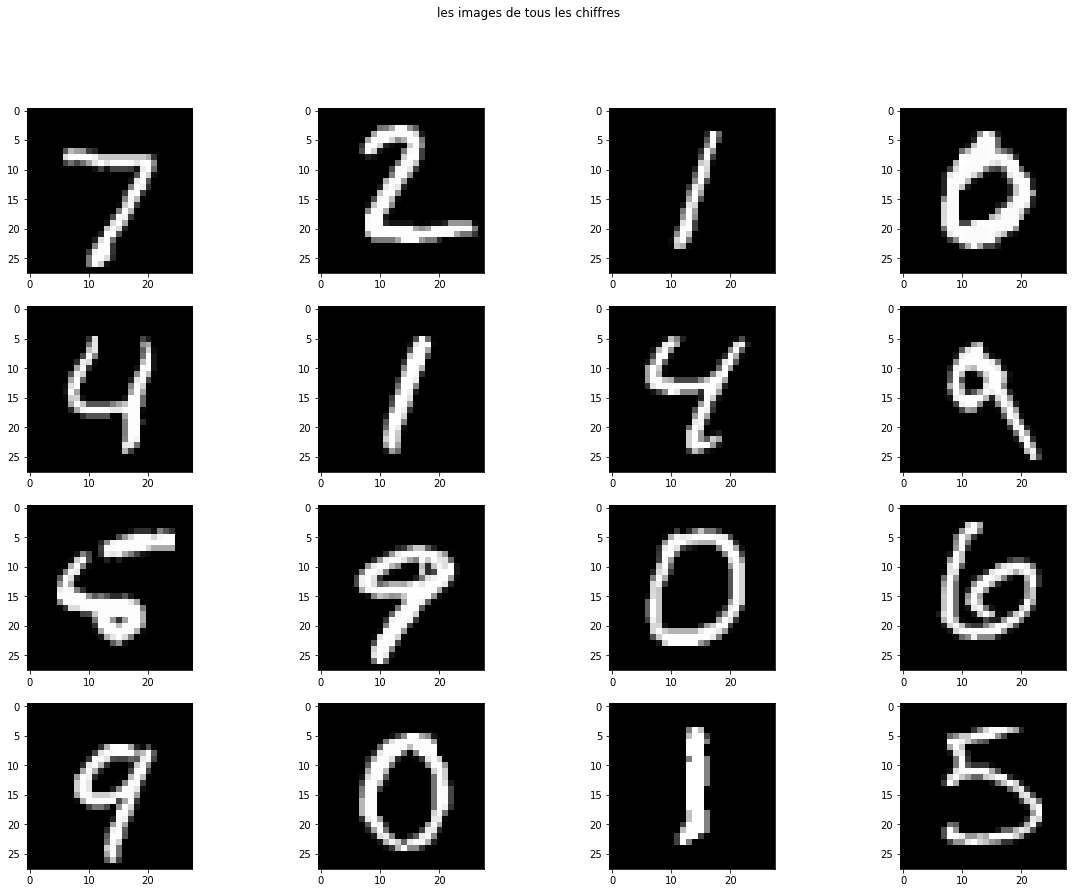

In [12]:
#n=nombre de ligne 
#m=nombre de colonne
#imagesc(en matlab) équilivant imshow(en python)

def show_chiffre(data,n,m,title):
    fig,ax= plt.subplots(n,m, figsize=(20, 14)) 
    ax = ax.ravel()
    fig.suptitle(title)
    tmp=n*m
    k=0
    i=1
    while i:
        #ax[k].set_title("Label: {}".format(mnist_labels[k]))
        ax[k].imshow(data[k].reshape(28,28),cmap=plt.cm.gray)
        k=k+1
        if tmp == k:
            i=0
            plt.savefig(title+".png")
            
            
show_chiffre(mnist_data,4,4,"les images de tous les chiffres")

In [11]:
#a et b
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#B = scaler.fit_transform(mnist_data)

#3.a

def moyenne(data):
    return np.mean(data,axis=0)

moyenne=moyenne(mnist_data)


In [10]:
#3.b
#Pour trouver le matrice A on dois calculer z=(x-µ)/σ, où µ est la moyenne et σ l'écart type
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#ici µ=moyenne et σ=std

std=np.std(mnist_data, axis=0)

def matrice_A(data,moyenne,std):
    tmp=[]
    for i in range (data.shape[0]):
        for j in range(data.shape[1]):
            if std[j]==0.0:
                tmp.append(0.)
            else:
                tmp.append((data[i,j]-moyenne[j])/std[j])
    return tmp

A=np.array(matrice_A(mnist_data,moyenne,std)).reshape(mnist_data.shape[0],mnist_data.shape[1])
A



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


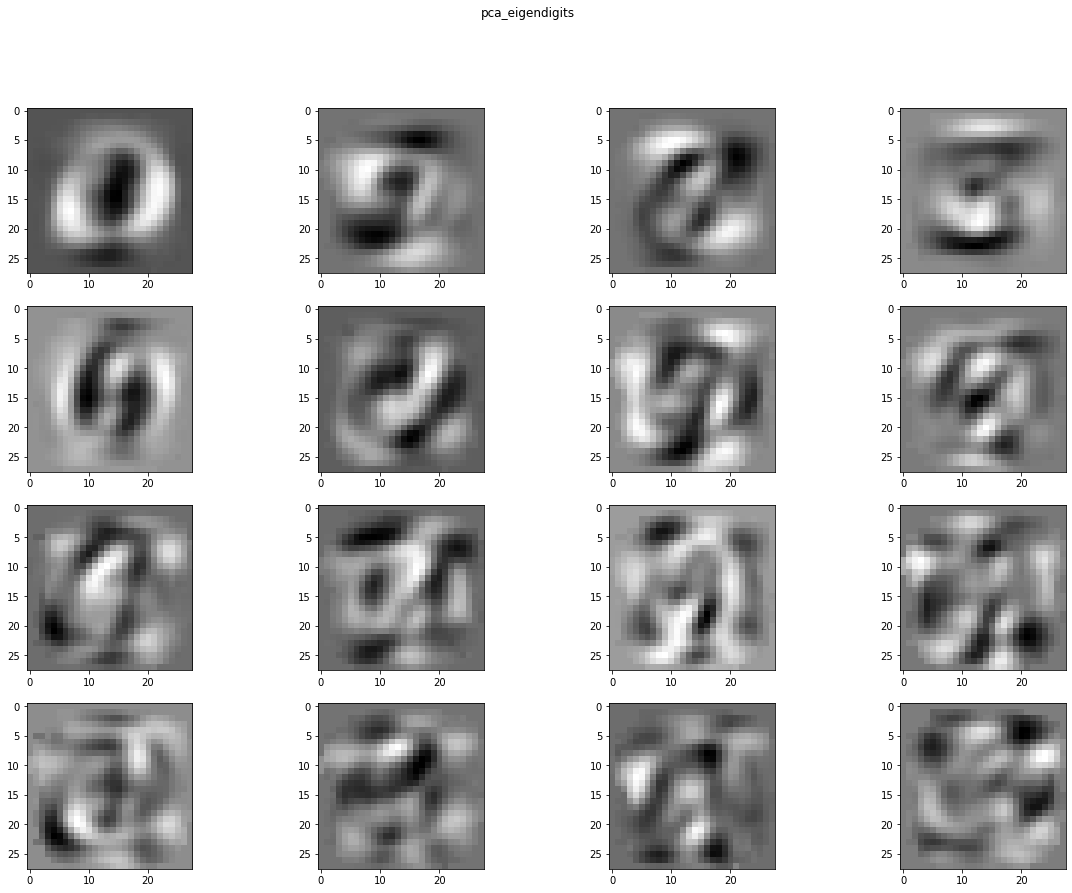

In [97]:
#3.c, 3.d, 3.e
pca=PCA(n_components=279)
pca.fit_transform(A)
pca_eigendigit=pca.components_

show_chiffre(pca_eigendigit,4,4,"pca_eigendigits")

# pour la courbe il faut changer n_components =64

# x=np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance');
# plt.axhline(y=0.95, color='r', linestyle='-')
# plt.axvline(x=x, color='r', linestyle='-')
# plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)


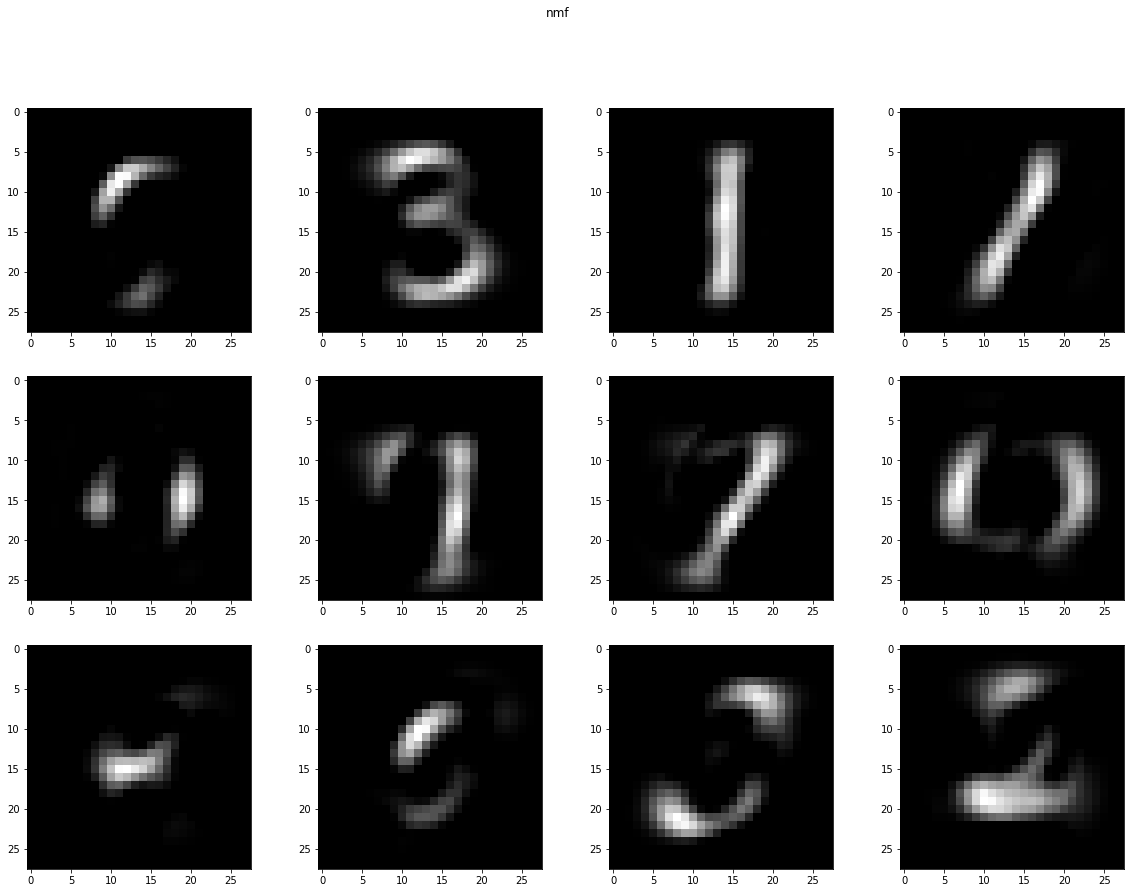

In [49]:
#4

nmf = NMF(n_components=12,init='random',random_state=0,max_iter=mnist_data.shape[0])

W = nmf.fit_transform(mnist_data) 
H = nmf.components_

show_chiffre(H,3,4,"nmf")

In [98]:
H

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

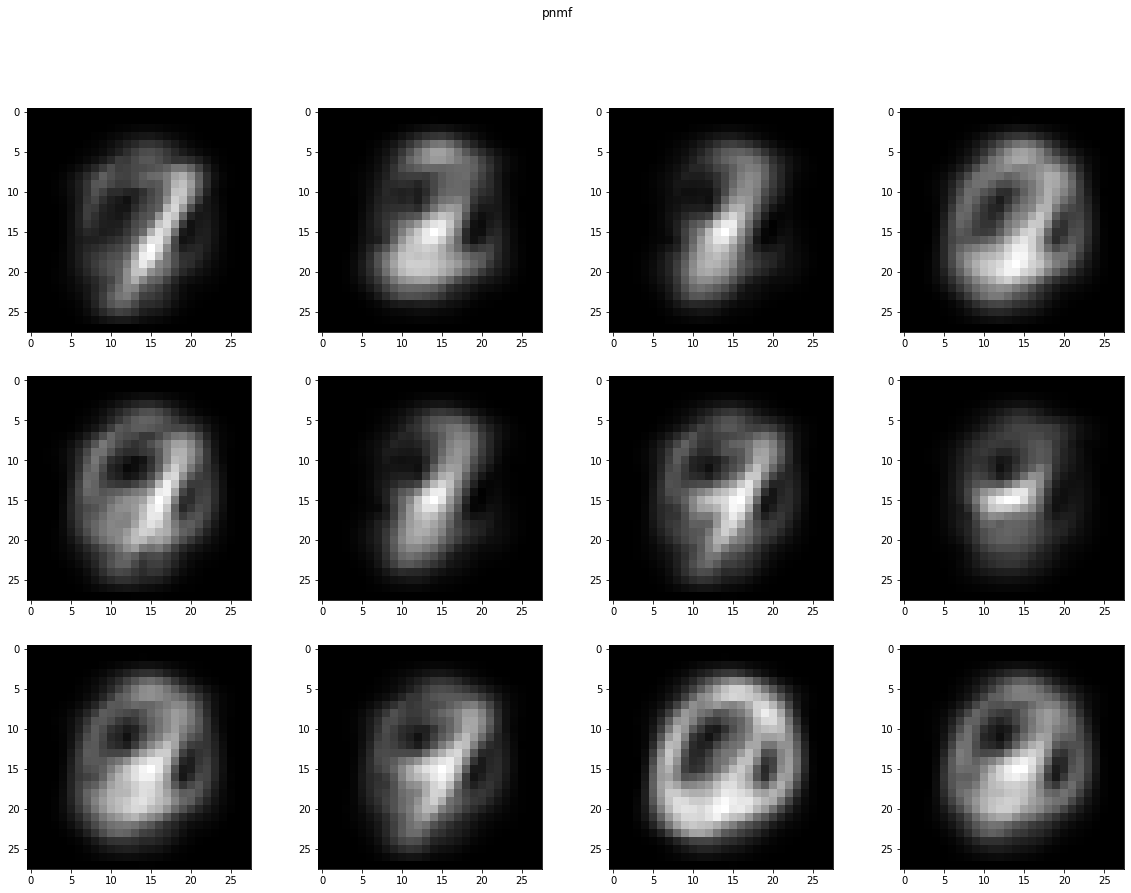

In [99]:
def ProjectionNMF(W,X):
    Wt = W.T
    WWt = Wt.dot(W)
    return X.dot(WWt)

pnmf = ProjectionNMF(H,mnist_data)
show_chiffre(pnmf,3,4,"pnmf")
pnmf



In [100]:
#6

def sparsity(A):
     return (1.0 - float(np.count_nonzero(A)) / A.size)


In [101]:
PCA_sparse = sparsity(pca_eigendigit)
print('PCA:' ,PCA_sparse)

NMF_sparse = sparsity(H)
print('NMF:', NMF_sparse)

PNMF_sparse = sparsity(pnmf)
print('PNMF:',PNMF_sparse)



PCA: 0.0749396532806671
NMF: 0.6994047619047619
PNMF: 0.14795918367346939


In [102]:
def sparsityH(A):
    n=A.shape[0]
    X= (np.sqrt(n)-( np.sum(abs(A),axis=1)) / ( np.sqrt((np.sum(A**2,axis=1))) ))/(np.sqrt(n)-1)
    S=np.mean(X)
    return S


In [103]:
PCA_sparseH = sparsityH(pca_eigendigit)
print('PCA-H:' ,PCA_sparseH)

NMF_sparseH = sparsityH(H)
print('NMF-H:', NMF_sparseH)

PNMF_sparseH = sparsityH(pnmf)
print('PNMF-H:',PNMF_sparseH)


PCA-H: -0.1829144731461411
NMF-H: -2.3848994782905377
PNMF-H: 0.848968649066339
